In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import sodapy
from sodapy import Socrata

# Top 500 Monthly Searches

The below uses the requests package just so I can have a preview of what I'm looking for with the other method

In [3]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
response.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

In [6]:
response.json

<bound method Response.json of <Response [200]>>

Truth be told, I'm not totally sure why this looks different from the other example, but that's okay!

coming back later to say I figured out why -- I forgot the () after the .json

I was just informed that the "examples don't use the requests package" does not mean that I can't use the requests package so... back to requests! 

##### question 1: Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [7]:
q1 = requests.get(endpoint+'?year=2016&query_text=fire')
q1

<Response [200]>

In [8]:
q1.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [9]:
q1j = q1.json()
q1j

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

Okay, so at a glance I can see that August had the most searches, but I want to see if I can get it ordered... I believe I could turn it into a pandas DataFrame, but I want to try to get it with the API request alone.

In [10]:
q1ordered = requests.get(endpoint+'?year=2016&query_text=fire&$order= query_count DESC')
q1jordered = q1ordered.json()
q1jordered

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'December',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_tex

##### question 1 answer: August had the most searches for "fire" in 2016 with 47 searches.

##### question 2: Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [11]:
#unsuccessful attempt -- query_count was a successful parameter for the ordering clause in the last question, but not this apparently
q2 = requests.get(endpoint+'?query_count>100')
q2j = q2.json()
q2j

{'error': True, 'message': 'Unrecognized arguments [query_count>100]'}

In [12]:
q2 = requests.get(endpoint+'?$where= query_count > 100')
q2j = q2.json()
q2j

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [13]:
q2jlength = len(q2j)
q2jlength

1000

I am truthfully surprised that this is such an even number, but the other people in my breakout room got this answer too, so... I am inclined to trust it.

##### question 2 answer: there were 1,000 times in the dataset where a query was run more than 100 times in a month.

##### question 3: Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [14]:
q3 = requests.get(endpoint+'?query_text=codes&$where= query_count > 100')
q3j = q3.json()
q3j

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [15]:
q3jlength = len(q3j)
q3jlength

56

##### question 3 answer: there were 56 times in the dataset where "codes" was searched more than 100 times in a month.

##### question 4: Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [16]:
q4 = requests.get(endpoint)
q4j = q4.json()
q4j

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [17]:
#I'm not sure if this is going to be helpful but I'm going to try to make a DataFrame

In [18]:
q4df = pd.DataFrame(q4j)
q4df

,month_name,year,query_count,query_text
0,January,2014,223,ebid
1,January,2014,112,property maps
2,January,2014,97,maps
3,January,2014,90,property tax
4,January,2014,76,jobs
...,...,...,...,...
995,February,2014,7,pay stubs
996,February,2014,7,school lunch menu
997,February,2014,7,contractors permit bond
998,February,2014,7,media


In [19]:
len(q4df)

1000

In [20]:
len(q4j)

1000

In [21]:
q4df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   1000 non-null   object
 1   year         1000 non-null   object
 2   query_count  1000 non-null   object
 3   query_text   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [22]:
maps_query = ['maps']
maps = q4df[q4df.query_text.isin(maps_query)]
maps

,month_name,year,query_count,query_text
2,January,2014,97,maps
503,February,2014,140,maps


In [23]:
#that cannot possibly be right

In [24]:
maps2 = q4df[q4df.query_text.str.contains('maps')]
maps2

,month_name,year,query_count,query_text
1,January,2014,112,property maps
2,January,2014,97,maps
111,January,2014,13,metro maps
223,January,2014,8,online property maps
232,January,2014,8,Property maps
503,February,2014,140,maps
504,February,2014,140,property maps
610,February,2014,19,plat maps
680,February,2014,13,online property maps
769,February,2014,10,zoning maps


In [25]:
len(maps2)

13

In [26]:
#that feels better, but not...great...

OKAY. I just realized that there is a default limit of 1000 records, which in hindsight should have been obvious but WE ARE LEARNING, but I can override the limit with the $limit parameter. The data.nashville.gov page with the top 500 search results dataset says there are 43.7K rows in this dataset, so I'm going to try to just have limit=50k and see if it doesn't take 5 hours to load.

In [27]:
q4 = requests.get(endpoint+'?$limit=50000')
q4j = q4.json()
q4j

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [28]:
len(q4j)

43677

In [29]:
#nice.

In [30]:
q4df = pd.DataFrame(q4j)
q4df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [31]:
maps = q4df[q4df.query_text.isin(maps_query)]
maps

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11
39688,December,2020,113,maps,12
41188,March,2021,132,maps,3
41683,April,2021,148,maps,4


In [32]:
maps["month_year"] = maps['month_name'] + " " + maps['year']
maps

C:\Users\ating\AppData\Local\Temp/ipykernel_22360/2620901550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps["month_year"] = maps['month_name'] + " " + maps['year']


,month_name,year,query_count,query_text,month,month_year
2,January,2014,97,maps,NaN,January 2014
503,February,2014,140,maps,NaN,February 2014
1005,March,2014,144,maps,NaN,March 2014
1503,April,2014,152,maps,NaN,April 2014
2003,May,2014,119,maps,NaN,May 2014
...,...,...,...,...,...,...
39196,November,2020,86,maps,11,November 2020
39688,December,2020,113,maps,12,December 2020
41188,March,2021,132,maps,3,March 2021
41683,April,2021,148,maps,4,April 2021


In [33]:
#going to dig into that warning message a bit more later, but for now, it looks like it did what I wanted, so I'm moving on

<function matplotlib.pyplot.show(close=None, block=None)>

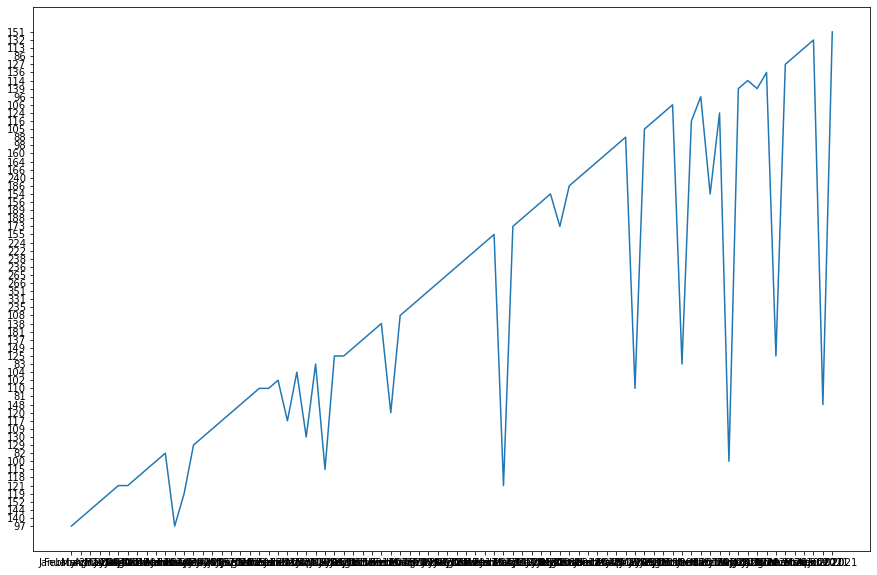

In [34]:
plt.figure(figsize=(15, 10))
plt.yticks()
plt.plot(maps['month_year'], maps['query_count'])
plt.show

In [35]:
#that's... weird. and the yticks are not in numerical order, and it's not a formatting issue...

In [36]:
q4df.describe()

,month_name,year,query_count,query_text,month
count,43677,43677,43676,43677,15177
unique,12,8,304,9455,12
top,January,2014,8,im,1
freq,4000,6000,3234,87,1500


In [37]:
#why isn't it giving me numeric details? wait I bet they're all stored as strings 

In [38]:
q4df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   43677 non-null  object
 1   year         43677 non-null  object
 2   query_count  43676 non-null  object
 3   query_text   43677 non-null  object
 4   month        15177 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [39]:
#I was right oop... plus I don't have the month-year column I want so rewind a bit

In [40]:
q4df["month_year"] = q4df['month_name'] + " " + q4df['year']

In [41]:
q4df_dropped = q4df.dropna()

In [42]:
q4df_dropped.astype({'year':'int32', 'query_count':'int32'}).dtypes #ran error, need to drop NaN rows, added cell above

month_name     object
year            int32
query_count     int32
query_text     object
month          object
month_year     object
dtype: object

In [43]:
maps = q4df_dropped[q4df_dropped.query_text.isin(maps_query)]
maps

,month_name,year,query_count,query_text,month,month_year
28612,January,2019,160,maps,1,January 2019
29374,February,2019,98,maps,2,February 2019
29857,March,2019,88,maps,3,March 2019
30309,April,2019,110,maps,4,April 2019
30856,May,2019,105,maps,5,May 2019
31098,June,2019,116,maps,6,June 2019
31507,July,2019,124,maps,7,July 2019
32010,August,2019,106,maps,8,August 2019
32515,September,2019,83,maps,9,September 2019
33014,October,2019,116,maps,10,October 2019


In [44]:
maps.describe()

,month_name,year,query_count,query_text,month,month_year
count,25,25,25,25,25,25
unique,12,3,22,1,12,25
top,March,2019,139,maps,3,January 2019
freq,3,11,2,25,3,1


In [45]:
#again?...
maps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 28612 to 42682
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   25 non-null     object
 1   year         25 non-null     object
 2   query_count  25 non-null     object
 3   query_text   25 non-null     object
 4   month        25 non-null     object
 5   month_year   25 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


In [46]:
maps.astype({'year':'int32', 'query_count':'int32'}).dtypes

month_name     object
year            int32
query_count     int32
query_text     object
month          object
month_year     object
dtype: object

In [47]:
maps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 28612 to 42682
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   25 non-null     object
 1   year         25 non-null     object
 2   query_count  25 non-null     object
 3   query_text   25 non-null     object
 4   month        25 non-null     object
 5   month_year   25 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

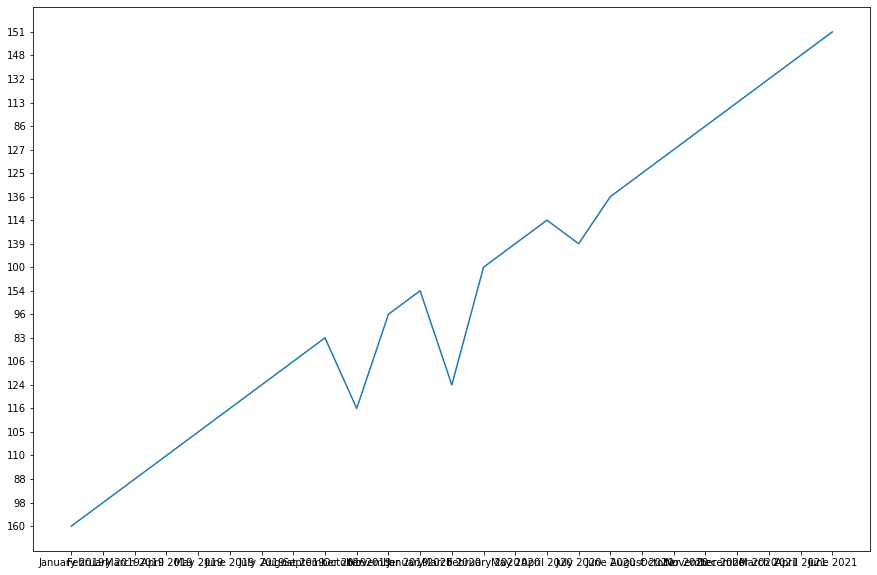

In [48]:
plt.figure(figsize=(15, 10))
plt.plot(maps['month_year'], maps['query_count'])
plt.show